In [18]:
import numpy as np
import torch
import matplotlib.pylab as pl
import pylab
import math
import ot
import seaborn as sns
sns.set_style("white")
import pandas as pd
import proplot as plot
plot.rc['figure.facecolor'] = "white"

In [19]:
if torch.cuda.is_available():
    device='cuda'
    dtype = torch.cuda.DoubleTensor
else:
    device='cpu'
    dtype=torch.DoubleTensor
print(device)

device='cpu'
dtype=torch.DoubleTensor
torch.set_default_tensor_type(dtype)

cuda


In [20]:
import sys
sys.path.append('../code/')

In [21]:
from utils_ICP import draw_samples,Y_to_X

In [29]:
xt=10*draw_samples("../Notebook/data/ICP/density_b.png", n=500).numpy()
n,dim=xt.shape
Y = torch.from_numpy(xt).to(device)
Y-=torch.mean(Y,axis=0)
X=Y_to_X(Y,trans=5,eps=.1)

# Expe Data
method_sinkhorn=np.loadtxt('../Notebook/Results/ICP/500_sinkhorn_loss.txt')
method_time=np.loadtxt('../Notebook/Results/ICP/500_timming.txt')
method_nb_ite=np.loadtxt('../Notebook/Results/ICP/500_nb_iteration.txt')
method_sinkhorn[:,[1,2]]=method_sinkhorn[:,[2,1]]
method_time[:,[1,2]]=method_time[:,[2,1]]
method_nb_ite[:,[1,2]]=method_nb_ite[:,[2,1]]

method=['min-SWGG','Nearest','OT']
table_1=pd.DataFrame(method_sinkhorn, columns=method)
table_2=pd.DataFrame(method_time, columns=method)
table_3=pd.DataFrame(method_nb_ite, columns=method)

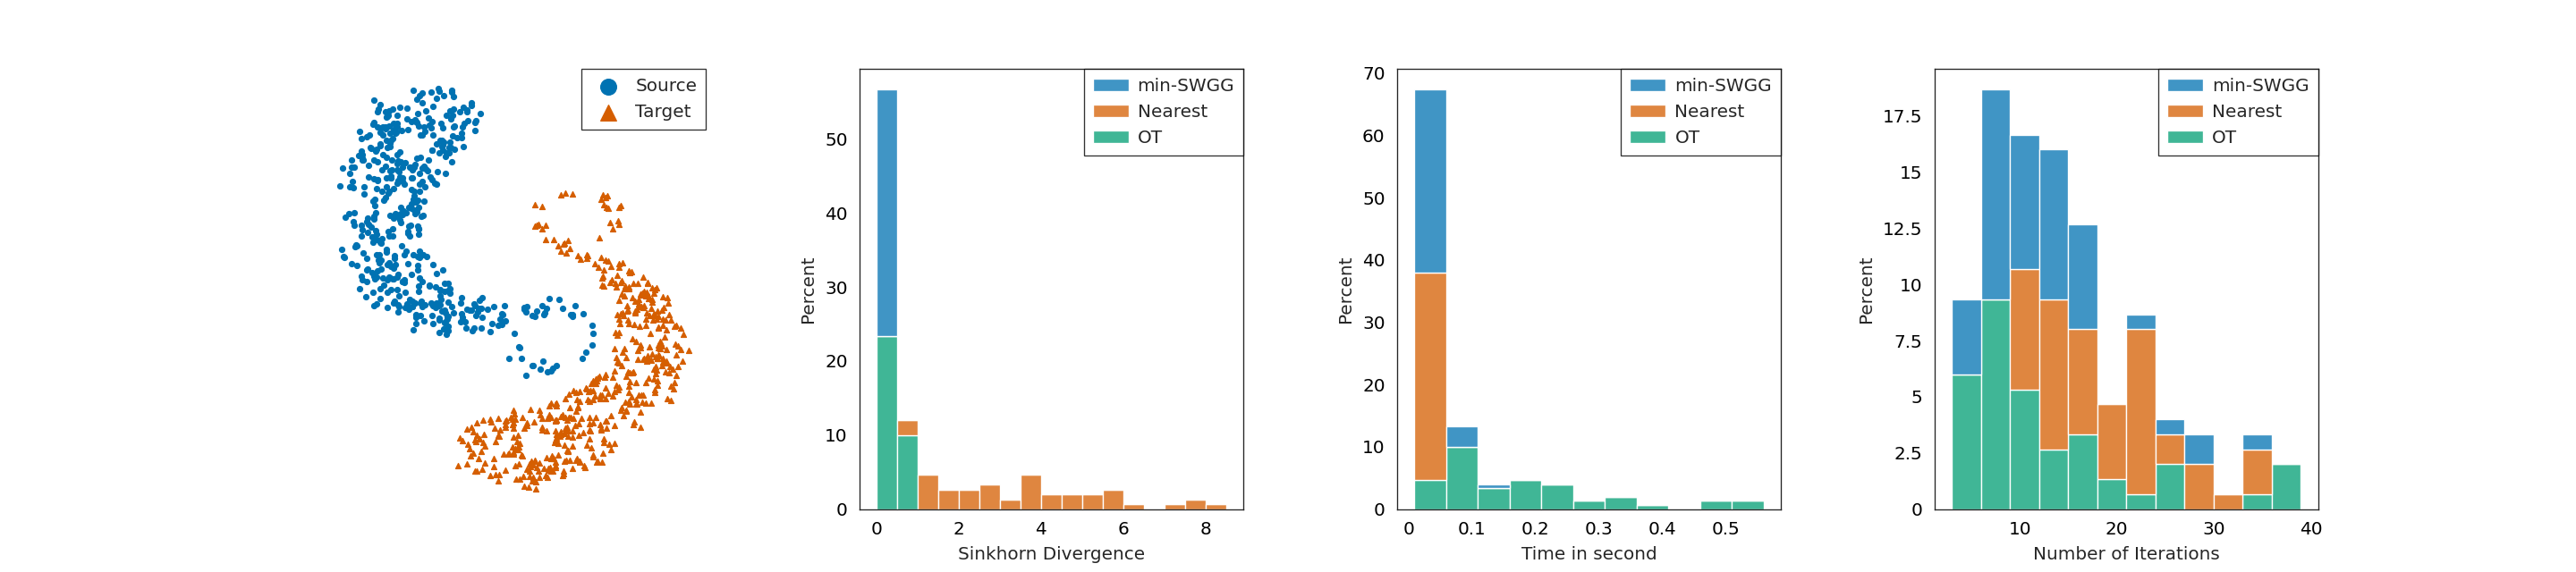

In [33]:
s=7

fig = pl.figure(figsize=(18,4),dpi= 80)
grid = pl.GridSpec(1,4, wspace=.4, hspace=0.1)


pl.subplot(grid[0,0])
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=s,marker='^')
pl.axis('off')
pl.legend(markerscale=3)


pl.subplot(grid[0,1])
sns.histplot(data=table_1,binwidth=.5,multiple="stack",stat='percent')
pl.xlabel('Sinkhorn Divergence')
    
pl.subplot(grid[0,2])
sns.histplot(data=table_2,binwidth=.05,multiple="stack",stat='percent')
pl.xlabel('Time in second')
 
pl.subplot(grid[0,3])
sns.histplot(data=table_3,binwidth=3,multiple="stack",stat='percent')
pl.xlabel('Number of Iterations')


pl.savefig("distrib_500.pdf",bbox_inches='tight')

In [177]:
xt=np.loadtxt('../Notebook/data/ICP/mumble_sitting_3000.pts', comments=("version:", "n_points:", "{", "}"))

n,dim=xt.shape
Y = torch.from_numpy(xt).to(device)
Y-=torch.mean(Y,axis=0)
X=Y_to_X(Y,trans=5,eps=.1)

# Expe Data
method_sinkhorn=np.loadtxt('../Notebook/Results/ICP/3000_sinkhorn_loss.txt')
method_time=np.loadtxt('../Notebook/Results/ICP/3000_timming.txt')
method_nb_ite=np.loadtxt('../Notebook/Results/ICP/3000_nb_iteration.txt')
method_sinkhorn[:,[1,2]]=method_sinkhorn[:,[2,1]]
method_time[:,[1,2]]=method_time[:,[2,1]]
method_nb_ite[:,[1,2]]=method_nb_ite[:,[2,1]]


method=['min-SWGG','Nearest','OT']
table_1=pd.DataFrame(method_sinkhorn, columns=method)
table_2=pd.DataFrame(method_time, columns=method)
table_3=pd.DataFrame(method_nb_ite, columns=method)

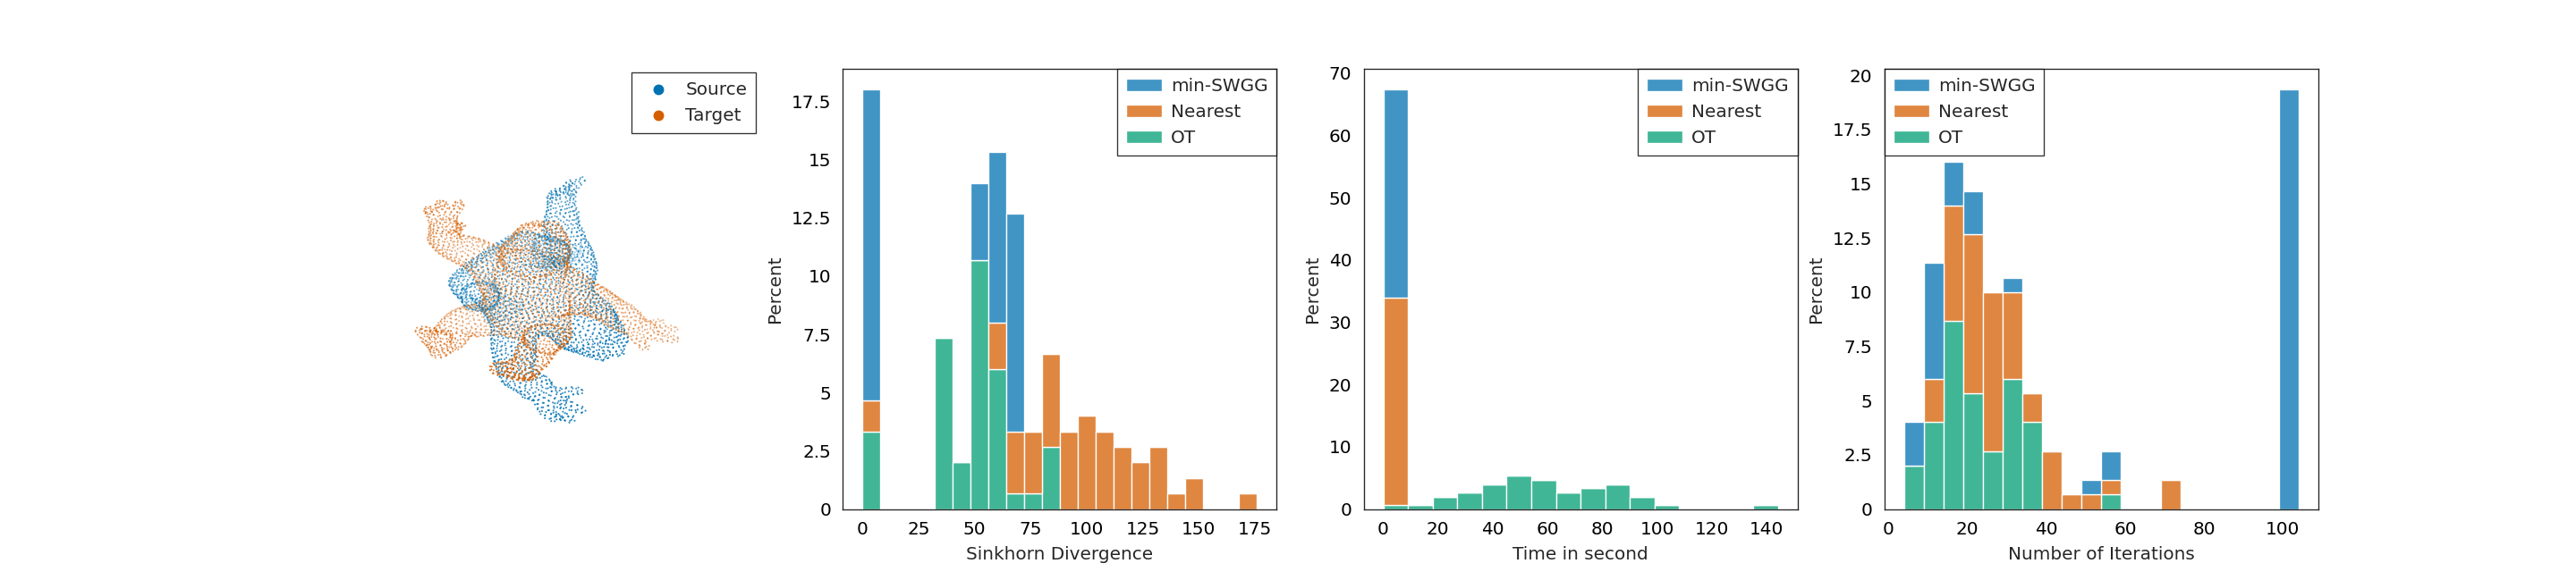

In [186]:

s=.1

fig = pl.figure(figsize=(18,4),dpi= 80)

ax = fig.add_subplot(141, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
pl.axis('off')
pl.scatter(X[:,0],X[:,1],zs=X[:,2],s=s,label='Source')
pl.scatter(Y[:,0],Y[:,1],zs=Y[:,2],s=s,label='Target')
pl.legend(markerscale=15)


ax = fig.add_subplot(142)
sns.histplot(data=table_1,binwidth=8,multiple="stack",stat='percent')
pl.xlabel('Sinkhorn Divergence')
    
ax = fig.add_subplot(143)
sns.histplot(data=table_2,binwidth=9,multiple="stack",stat='percent')
pl.xlabel('Time in second')
 
ax = fig.add_subplot(144)
sns.histplot(data=table_3,binwidth=5,multiple="stack",stat='percent')
pl.xlabel('Number of Iterations')


pl.savefig("distrib_3000.pdf",bbox_inches='tight')


In [187]:
xt=np.loadtxt('../Notebook/data/ICP/WitchCastle_150000.pts', comments=("version:", "n_points:", "{", "}"))
n,dim=xt.shape
Y = torch.from_numpy(xt).to(device)
Y-=torch.mean(Y,axis=0)
X=Y_to_X(Y,trans=5,eps=.1)

# Expe Data
method_sinkhorn=np.loadtxt('../Notebook/Results/ICP/150000_sinkhorn_loss.txt')
method_time=np.loadtxt('../Notebook/Results/ICP/150000_timming.txt')
method_nb_ite=np.loadtxt('../Notebook/Results/ICP/150000_nb_iteration.txt')

method=['min-SWGG','Nearest']
table_1=pd.DataFrame(method_sinkhorn, columns=method)
table_2=pd.DataFrame(method_time, columns=method)
table_3=pd.DataFrame(method_nb_ite, columns=method)

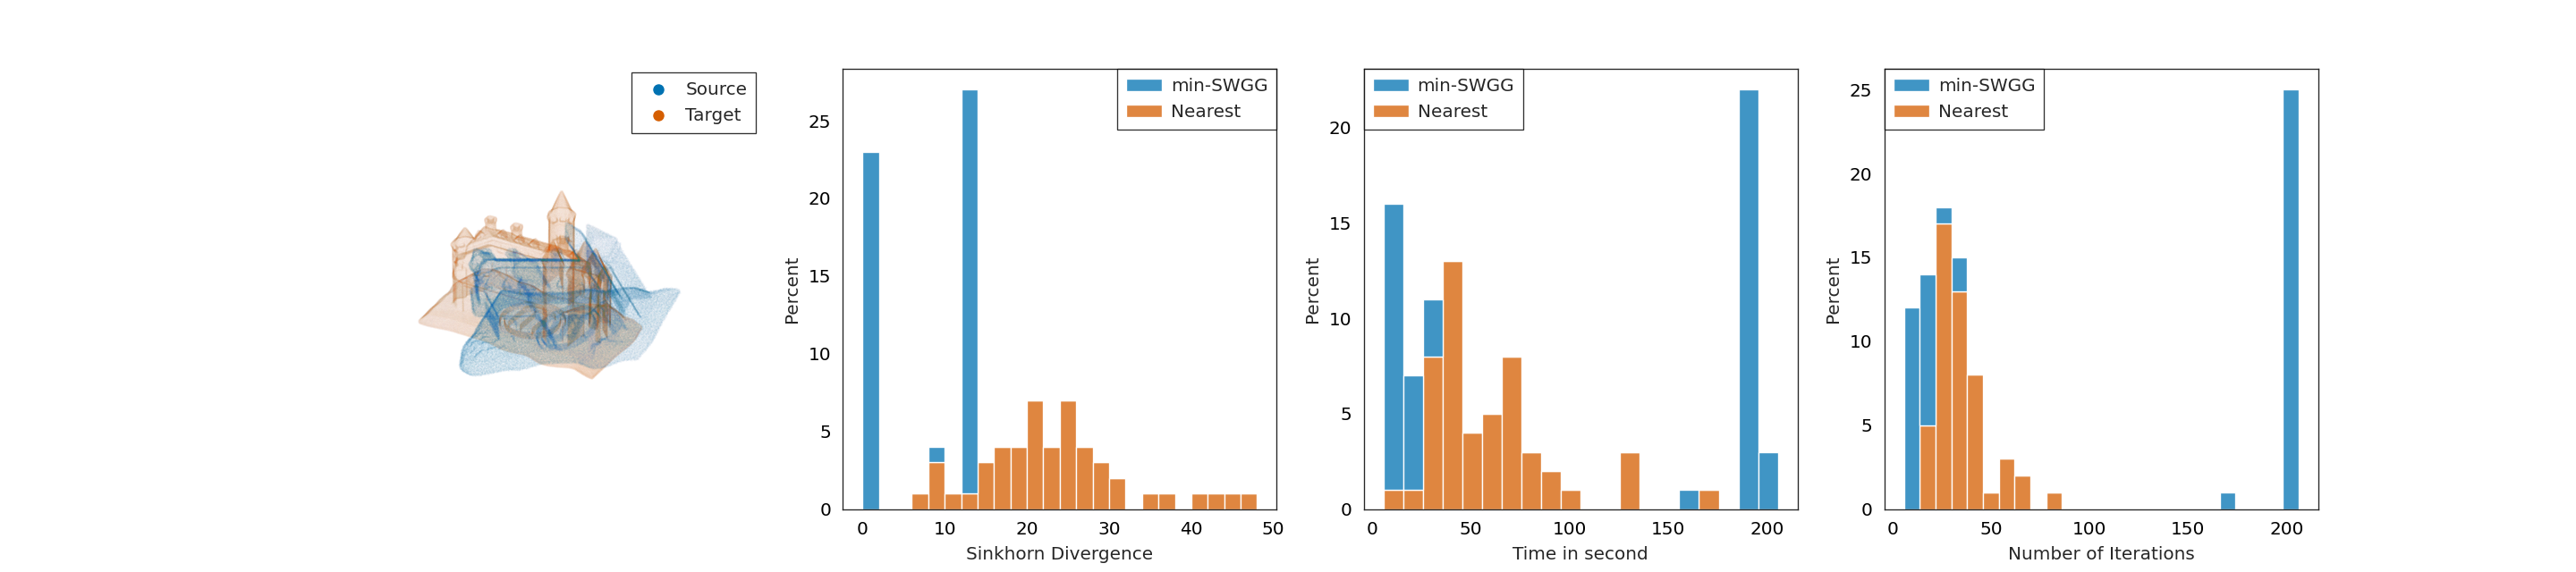

In [192]:

s=.0001

fig = pl.figure(figsize=(18,4),dpi= 80)

ax = fig.add_subplot(141, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
pl.axis('off')
pl.scatter(X[:,0],X[:,1],zs=X[:,2],s=s,label='Source')
pl.scatter(Y[:,0],Y[:,1],zs=Y[:,2],s=s,label='Target')
pl.legend(markerscale=500)


ax = fig.add_subplot(142)
sns.histplot(data=table_1,binwidth=2,multiple="stack",stat='percent')
pl.xlabel('Sinkhorn Divergence')
    
ax = fig.add_subplot(143)
sns.histplot(data=table_2,binwidth=10,multiple="stack",stat='percent')
pl.xlabel('Time in second')
 
ax = fig.add_subplot(144)
sns.histplot(data=table_3,binwidth=8,multiple="stack",stat='percent')
pl.xlabel('Number of Iterations')


pl.savefig("distrib_150000.png",bbox_inches='tight')

In [17]:
xt=np.loadtxt('../Notebook/data/ICP/mumble_sitting_3000.pts', comments=("version:", "n_points:", "{", "}"))

n,dim=xt.shape
Y = torch.from_numpy(xt).to(device)
Y-=torch.mean(Y,axis=0)
X=Y_to_X(Y,trans=5,eps=.1)
X=X+torch.tensor([9,12,3])

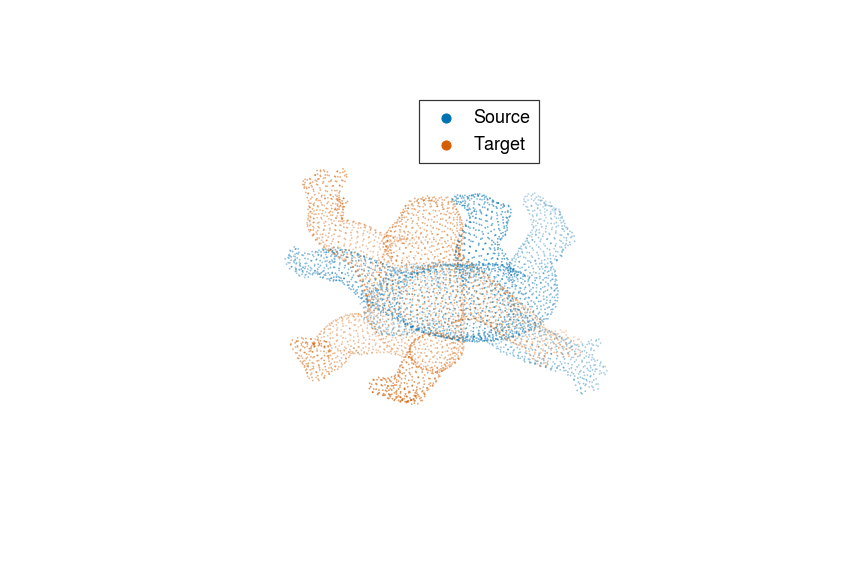

In [47]:


s=.05

fig = pl.figure(figsize=(6,4))

ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
pl.axis('off')
pl.scatter(X[:,0],X[:,1],zs=X[:,2],s=s,label='Source')
pl.scatter(Y[:,0],Y[:,1],zs=Y[:,2],s=s,label='Target')
pl.legend(markerscale=20,bbox_to_anchor=(0.7, 0.85))
pl.tight_layout()
pl.savefig("example_3000.pdf",bbox_inches='tight')